🧹 Đang quét sạch Stopwords...


Loading lists: 100%|█████████████████████████████████████████████████████████████| 4093/4093 [00:01<00:00, 2389.27it/s]



--- TOP 20 TỪ XUẤT HIỆN NHIỀU NHẤT SAU KHI LỌC ---


C:\Users\thaip\AppData\Local\Temp\ipykernel_15996\2828449521.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


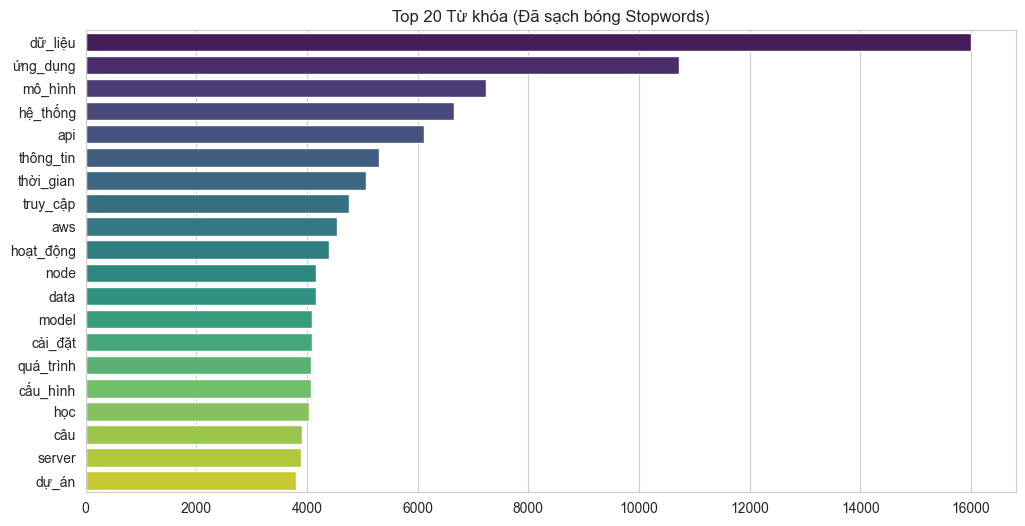

✅ Đã lưu file sạch: clean_data.csv


In [8]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 1. ĐỌC FILE DỮ LIỆU
df = pd.read_csv("clean_data.csv")

# Chuyển đổi string thành list thực tế
tqdm.pandas(desc="Loading lists")
df['tokens'] = df['tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
df['tags_final'] = df['tags_final'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# 2. XÂY DỰNG DANH SÁCH STOPWORDS "MẠNH TAY"
# Load từ file chuẩn
try:
    with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as f:
        stopwords_set = set(line.strip() for line in f if line.strip())
except:
    stopwords_set = set()

# --- QUAN TRỌNG: Bổ sung từ rác đặc thù của Blog Kỹ thuật ---
custom_trash_words = {
    # Từ xưng hô, giao tiếp
    'mình', 'bạn', 'chúng_ta', 'tôi', 'các_bạn', 'mọi_người', 'anh_em', 'nhé', 'nha', 'đây', 'đó',
    # Từ nối, hư từ
    'thì', 'là', 'mà', 'và', 'của', 'những', 'các', 'để', 'trong', 'một', 'có', 'được', 'với', 
    'cho', 'khi', 'này', 'làm', 'việc', 'cách', 'sẽ', 'phải', 'như', 'ra', 'vào', 'tại', 'bởi',
    'nhưng', 'nếu', 'hoặc', 'tuy_nhiên', 'vì_vậy', 'rằng', 'thực_sự', 'rất', 'lắm', 'quá',
    # Từ ngữ blog/bài viết (Model không cần biết đây là bài viết)
    'bài', 'viết', 'phần', 'hướng_dẫn', 'ví_dụ', 'tổng_quan', 'giới_thiệu', 'cơ_bản', 'nâng_cao',
    'tìm_hiểu', 'chia_sẻ', 'bắt_đầu', 'kết_luận', 'tài_liệu', 'tham_khảo', 'link', 'ảnh', 'hình',
    'source', 'code', 'demo', 'project', 'ứng_ dụng', 'sử_dụng', 'thực_hiện', 'vấn_đề',
    # Tiếng Anh rác thường gặp
    'hello', 'world', 'hi', 'guys', 'welcome', 'summary', 'introduction', 'part', 'chapter',
    'image', 'title', 'alt', 'http', 'https', 'com', 'org', 'net', 'www','and', 'the', 'to', 'ta', 'in', 'of', 'for', 'file', 'phát_triển', 'giá_trị', 'xử_lý','chạy', 'giúp','mã','code','khả_năng','is','có_thể','hàm','công_cụ','quản_lý','gọi','phép',
    'lỗi', 'error', 'you', 'with', 'hoạt động', 'kết_quả', 'thay_đổi', 'hỗ_trợ', 'một_số', 'kiểm_tra','triển_khai', 'cung_cấp', 'yêu_cầu', 'đơn_giản', 'it'
}

stopwords_set.update(custom_trash_words)

# 3. HÀM LỌC STOPWORDS
def remove_stopwords_strict(tokens):
    return [
        word for word in tokens 
        if word not in stopwords_set      # Bỏ từ trong danh sách chặn
        and len(word) > 1                 # Bỏ từ 1 ký tự (a, b, c, 1, 2...)
        and not word.isnumeric()          # Bỏ số thuần túy
        and not word.startswith('_')      # Bỏ lỗi tokenize (vd: _id)
    ]

print("🧹 Đang quét sạch Stopwords...")
df['tokens_clean'] = df['tokens'].progress_apply(remove_stopwords_strict)

# Loại bỏ bài viết bị rỗng sau khi lọc hết từ (nếu có)
df = df[df['tokens_clean'].map(len) > 0]

# Cập nhật lại cột tokens chính
df['tokens'] = df['tokens_clean']
df.drop(columns=['tokens_clean'], inplace=True)

# 4. KIỂM TRA LẠI KẾT QUẢ (TOP WORDS)
# Sau khi lọc, Top words phải là keyword công nghệ (Python, Java...) mới đúng.
all_words = [word for tokens in df['tokens'] for word in tokens]
word_counts = Counter(all_words).most_common(20)

print("\n--- TOP 20 TỪ XUẤT HIỆN NHIỀU NHẤT SAU KHI LỌC ---")
words = [w[0] for w in word_counts]
counts = [w[1] for w in word_counts]

plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title("Top 20 Từ khóa (Đã sạch bóng Stopwords)")
plt.show()

# 5. LƯU FILE MỚI
df.to_csv("clean_data_no_stopwords.csv", index=False)
print("✅ Đã lưu file sạch: clean_data.csv")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.manifold import TSNE
from tqdm.auto import tqdm  # dùng tqdm với pandas

# --- CẤU HÌNH HIỂN THỊ ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- 1. ĐỌC DỮ LIỆU ---
print("📂 Đang tải dữ liệu...")
df = pd.read_csv("clean_data_no_stopwords.csv")
print(f"📊 Dữ liệu ban đầu: {df.shape[0]} dòng, {df.shape[1]} cột")

# --- 2. KÍCH HOẠT PROGRESS BAR CHO PANDAS ---
tqdm.pandas(desc="Converting types")

# --- 3. HÀM CHUYỂN STRING -> LIST AN TOÀN ---
def safe_literal_eval(val):
    """
    Chuyển chuỗi dạng "['python','ai']" thành list thực tế.
    Nếu val không phải string hoặc lỗi, trả về list rỗng []
    """
    try:
        if isinstance(val, str):
            return ast.literal_eval(val)
        return []
    except Exception as e:
        # print(f"Lỗi convert: {val} -> {e}")  # có thể bật debug
        return []

# --- 4. CHUYỂN CÁC CỘT ---
df['tags_final'] = df['tags_final'].progress_apply(safe_literal_eval)
df['tokens'] = df['tokens'].progress_apply(safe_literal_eval)

# --- 5. LOẠI BỎ DÒNG TRỐNG ---
df = df[df['tags_final'].map(len) > 0]
df = df[df['tokens'].map(len) > 0]

print(f"✅ Dữ liệu đã sạch: {df.shape[0]} dòng còn lại")
print("-" * 50)


📂 Đang tải dữ liệu...
📊 Dữ liệu ban đầu: 4093 dòng, 13 cột


Converting types:   0%|          | 0/4093 [00:00<?, ?it/s]

Converting types:   0%|          | 0/4093 [00:00<?, ?it/s]

✅ Dữ liệu đã sạch: 4093 dòng còn lại
--------------------------------------------------


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\1883376469.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tags_df, x='Count', y='Tag', palette='viridis')


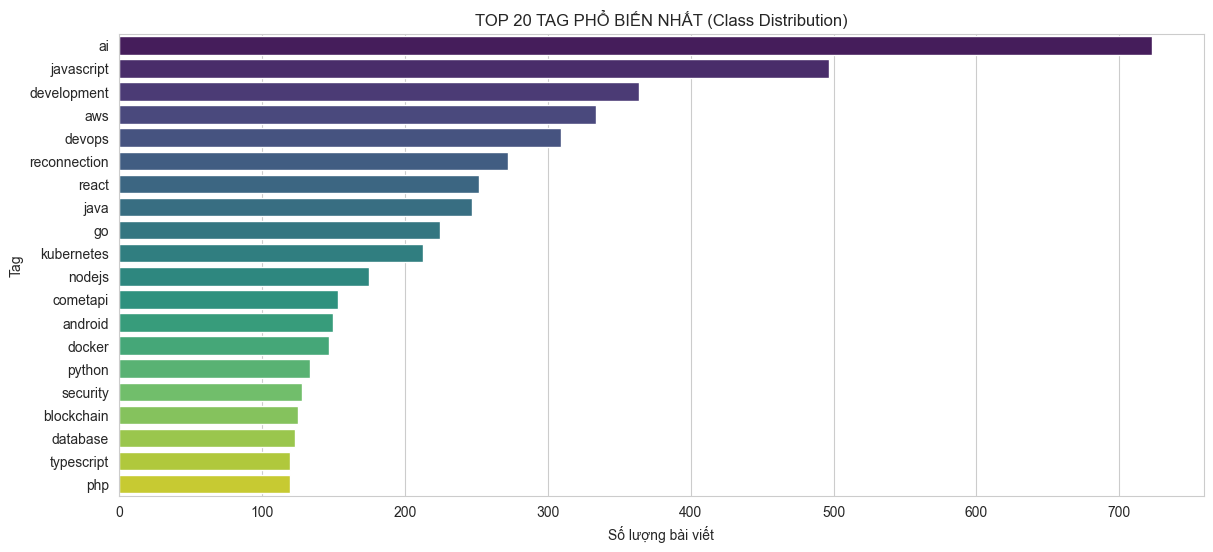

C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\1883376469.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num_tags', palette='magma')


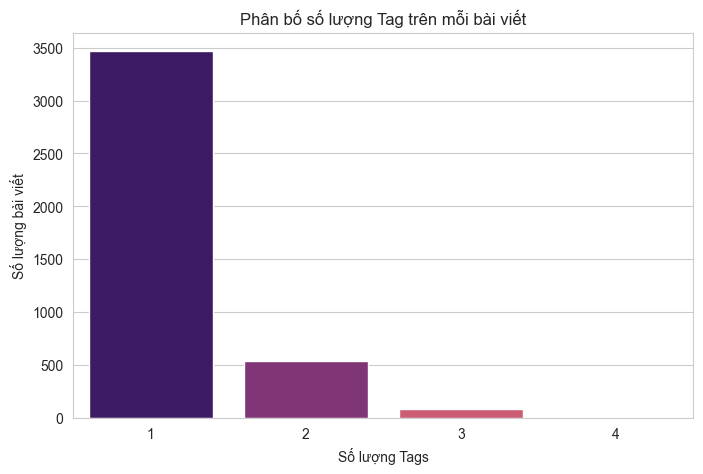

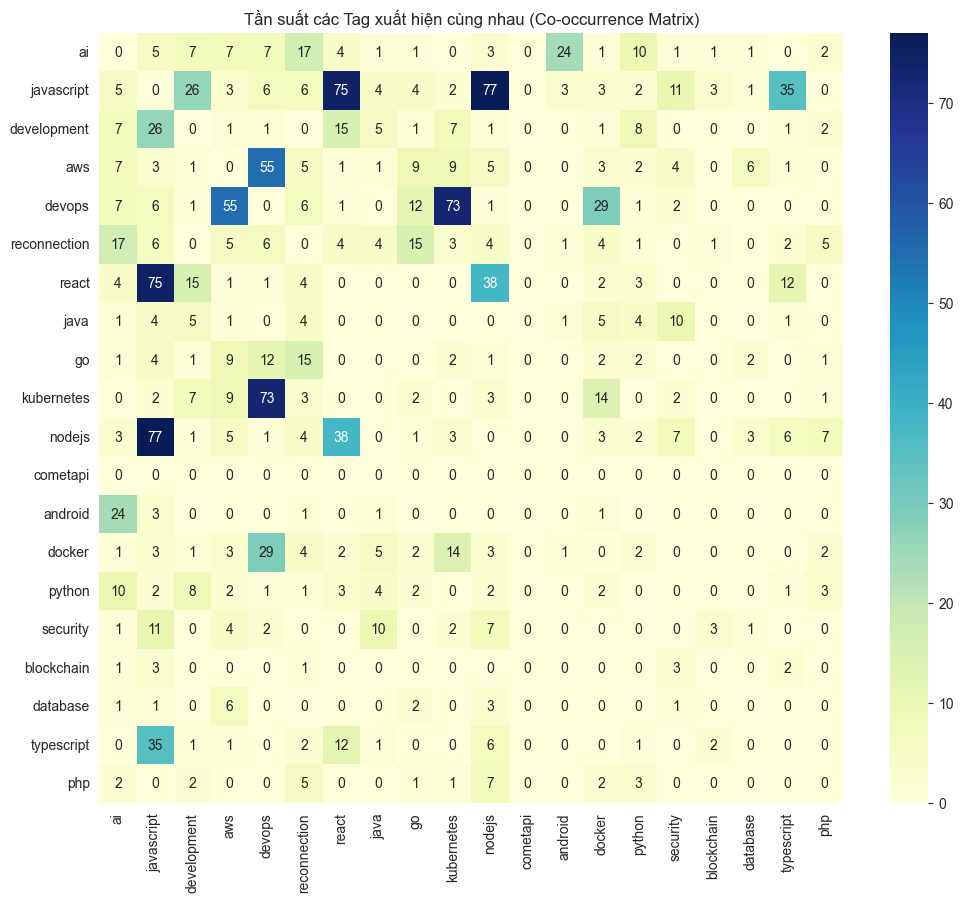

In [7]:
# --- A. PHÂN BỐ SỐ LƯỢNG TAGS ---
# Explode để đếm từng tag riêng lẻ
all_tags = [tag for tags in df['tags_final'] for tag in tags]
tag_counts = Counter(all_tags)
top_tags = tag_counts.most_common(20)

# Vẽ biểu đồ Top 20 Tags
plt.figure(figsize=(14, 6))
tags_df = pd.DataFrame(top_tags, columns=['Tag', 'Count'])
sns.barplot(data=tags_df, x='Count', y='Tag', palette='viridis')
plt.title('TOP 20 TAG PHỔ BIẾN NHẤT (Class Distribution)')
plt.xlabel('Số lượng bài viết')
plt.show()

# --- B. SỐ LƯỢNG TAG TRÊN MỖI BÀI VIẾT ---
# Bài viết thường có mấy tag? 1, 2 hay nhiều hơn?
df['num_tags'] = df['tags_final'].apply(len)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='num_tags', palette='magma')
plt.title('Phân bố số lượng Tag trên mỗi bài viết')
plt.xlabel('Số lượng Tags')
plt.ylabel('Số lượng bài viết')
plt.show()

# --- C. MA TRẬN TƯƠNG QUAN GIỮA CÁC TAG (CO-OCCURRENCE) ---
# Kiểm tra xem các tag nào hay đi cùng nhau (Ví dụ: React hay đi cùng Javascript)
mlb = MultiLabelBinarizer()
y_binary = mlb.fit_transform(df['tags_final'])
tag_corr_df = pd.DataFrame(y_binary, columns=mlb.classes_)

# Tính ma trận xuất hiện cùng nhau
co_occurrence = tag_corr_df.T.dot(tag_corr_df)
np.fill_diagonal(co_occurrence.values, 0) # Xóa đường chéo chính để dễ nhìn

# Chỉ lấy top 20 tag phổ biến nhất để vẽ Heatmap cho đỡ rối
top_20_tag_names = [t[0] for t in top_tags]
co_occurrence_subset = co_occurrence.loc[top_20_tag_names, top_20_tag_names]

plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_subset, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Tần suất các Tag xuất hiện cùng nhau (Co-occurrence Matrix)')
plt.show()

C:\Users\thaip\AppData\Local\Temp\ipykernel_15996\2277762178.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')
C:\Users\thaip\AppData\Local\Temp\ipykernel_15996\2277762178.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')
C:\Users\thaip\AppData\Local\Temp\ipykernel_15996\2277762178.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')
C:\Users\thaip\AppData

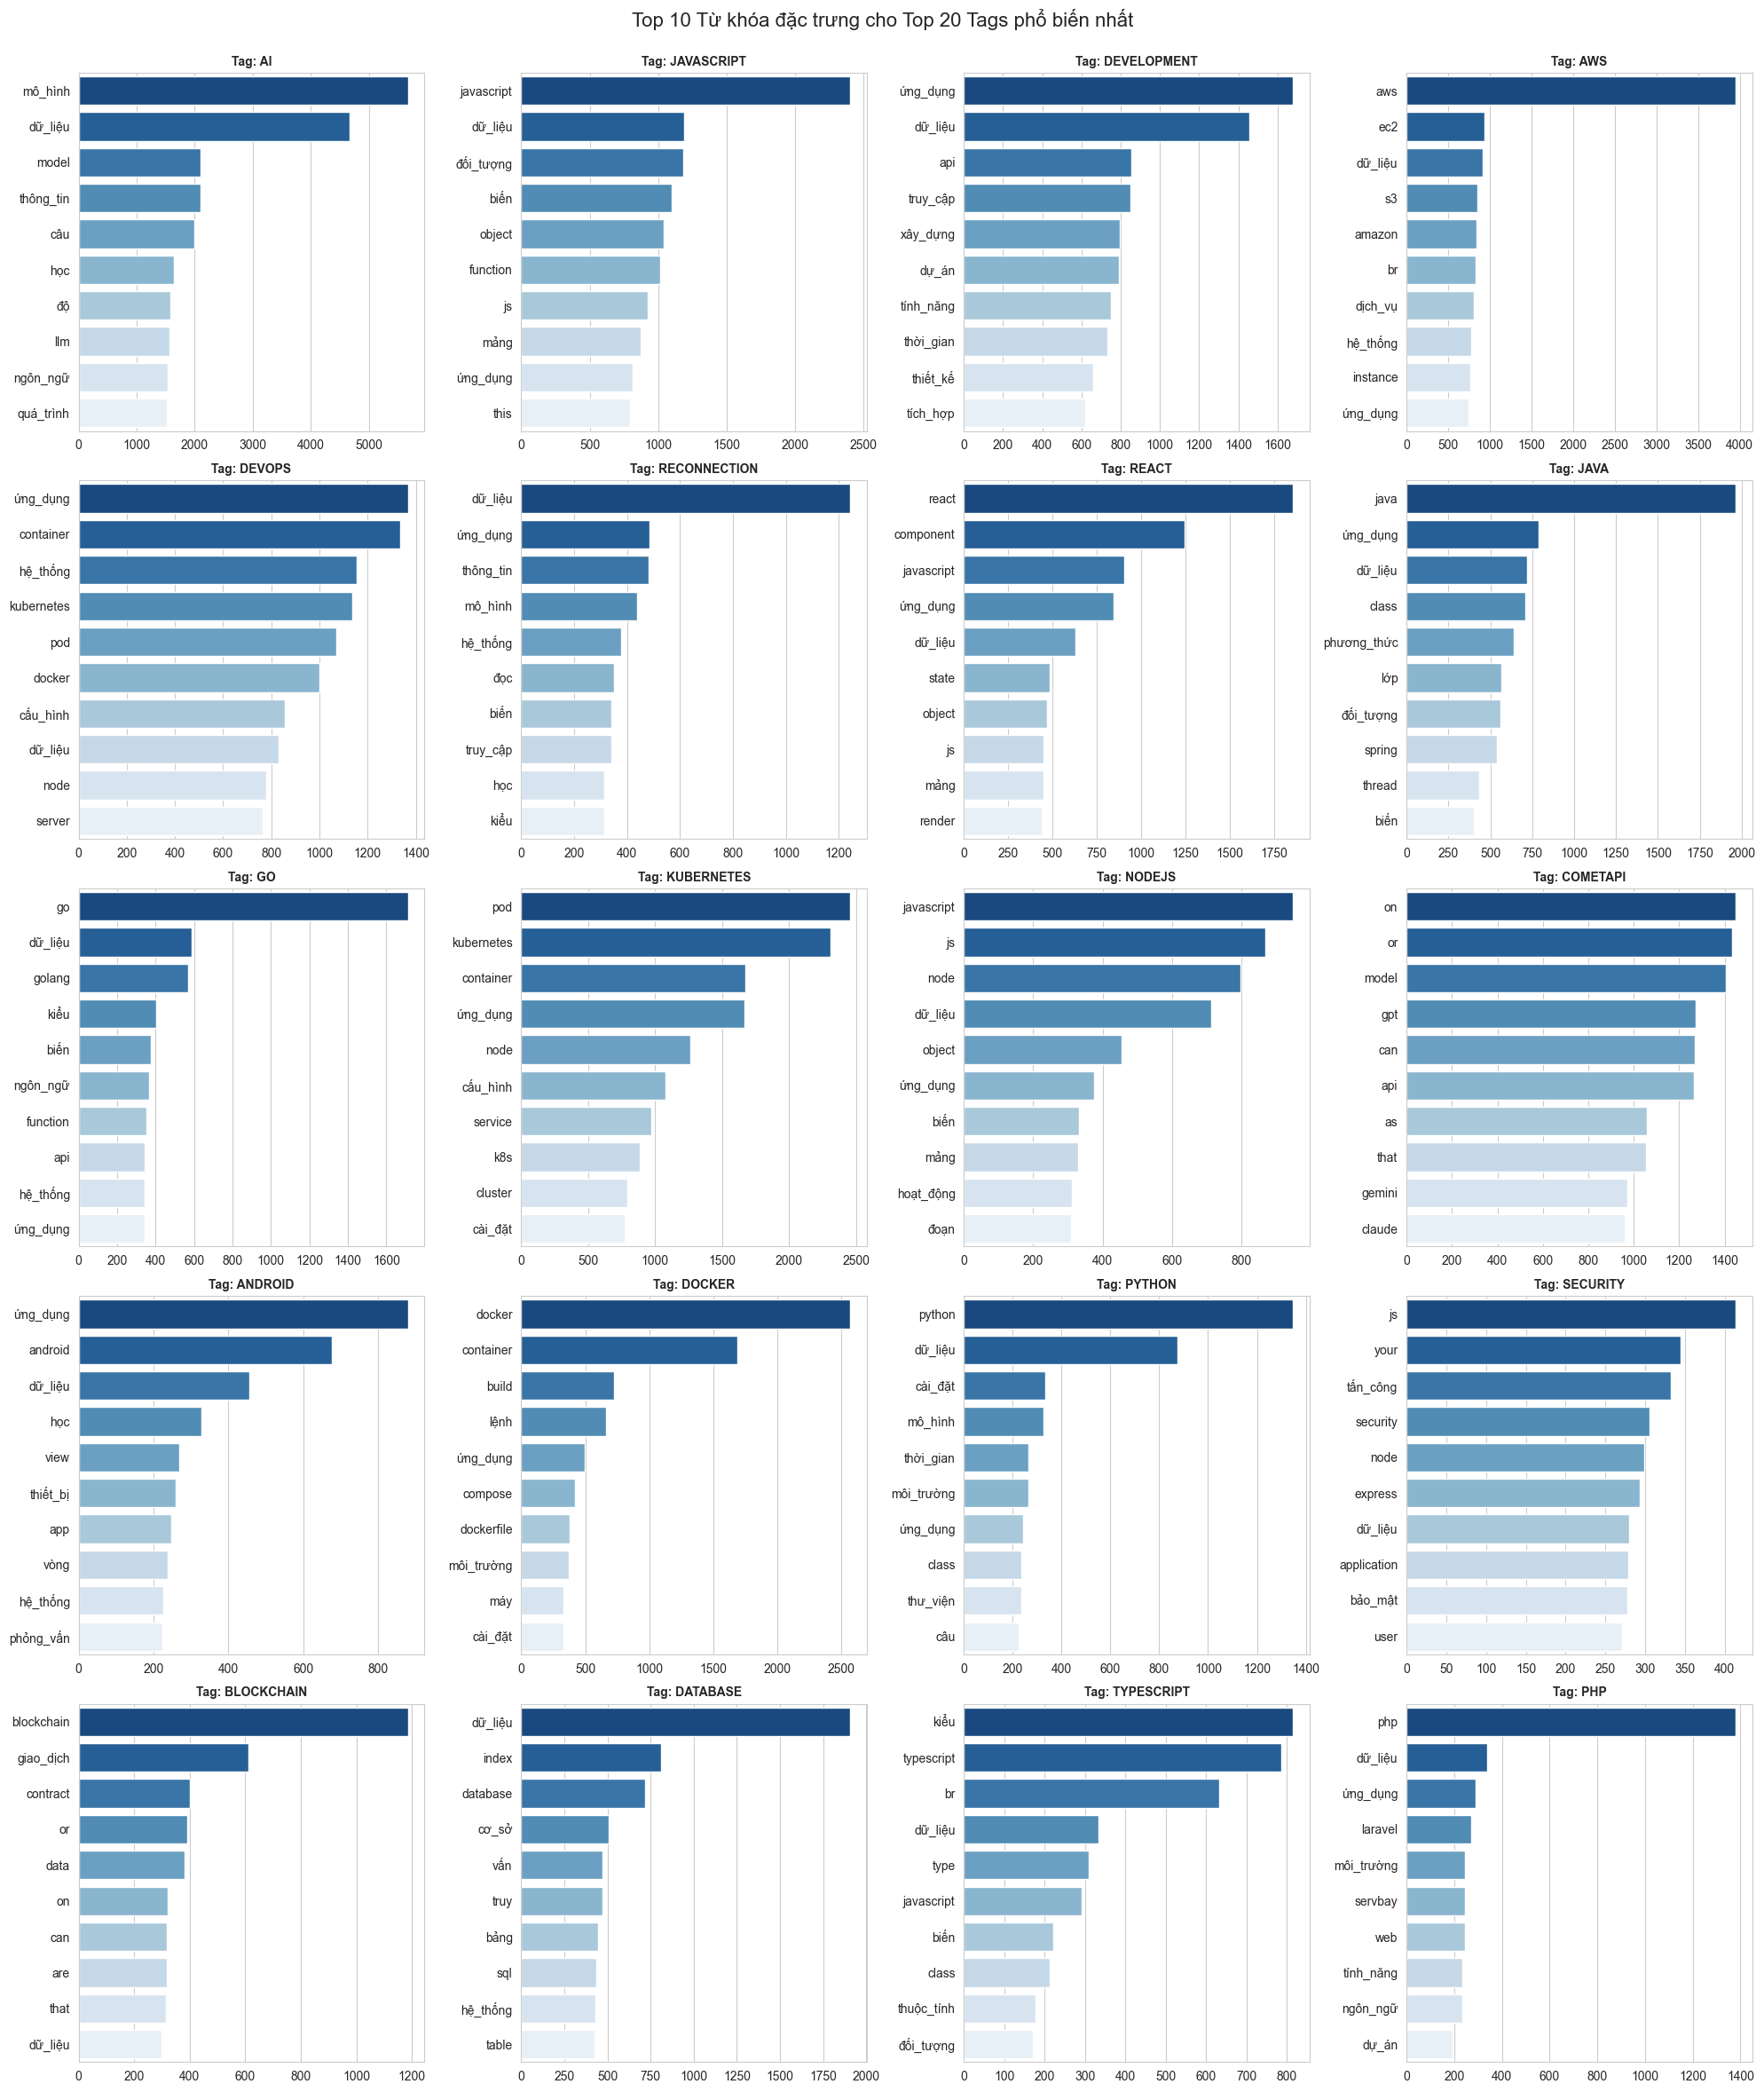

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import math

# --- B. KIỂM TRA TỪ KHÓA ĐẶC TRƯNG (TOP WORDS PER TAG) ---

def plot_top_words(tag, ax):
    # Lấy các bài viết chứa tag này
    subset = df[df['tags_final'].apply(lambda x: tag in x)]
    
    # Gộp tất cả tokens lại thành văn bản
    text = " ".join([" ".join(tokens) for tokens in subset['tokens']])
    
    # Nếu không có từ nào (dữ liệu rỗng), bỏ qua
    if not text.strip():
        return

    # Dùng CountVectorizer để đếm top 10 từ
    try:
        vec = CountVectorizer(max_features=10).fit([text])
        bag_of_words = vec.transform([text])
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        words_df = pd.DataFrame(words_freq, columns=['Word', 'Freq'])
        
        # Vẽ Barplot lên trục ax được chỉ định
        sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')
        ax.set_title(f"Tag: {tag.upper()}", fontsize=10, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('')
    except ValueError:
        # Trường hợp tag có quá ít bài viết hoặc từ vựng
        ax.set_title(f"Tag: {tag.upper()} (No Data)", fontsize=10)

# --- CẤU HÌNH VẼ LƯỚI 5x4 CHO 20 TAGS ---
n_tags = len(top_20_tag_names) # Đảm bảo biến này có 20 phần tử
n_cols = 4
n_rows = math.ceil(n_tags / n_cols) # Tự động tính số dòng (thường là 5)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 24)) # Tăng chiều cao lên 24 để đủ chỗ
axes = axes.flatten() # Làm phẳng mảng axes để dễ loop

# Vòng lặp vẽ từng Tag
for i, tag_name in enumerate(top_20_tag_names):
    plot_top_words(tag_name, axes[i])

# Tắt các ô thừa nếu có (ví dụ lưới 20 ô mà chỉ có 18 tag)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95) # Chừa chỗ cho tiêu đề tổng nếu cần
plt.suptitle('Top 10 Từ khóa đặc trưng cho Top 20 Tags phổ biến nhất', fontsize=16)
plt.show()

⏳ Đang chạy t-SNE (có thể mất 1-2 phút)...


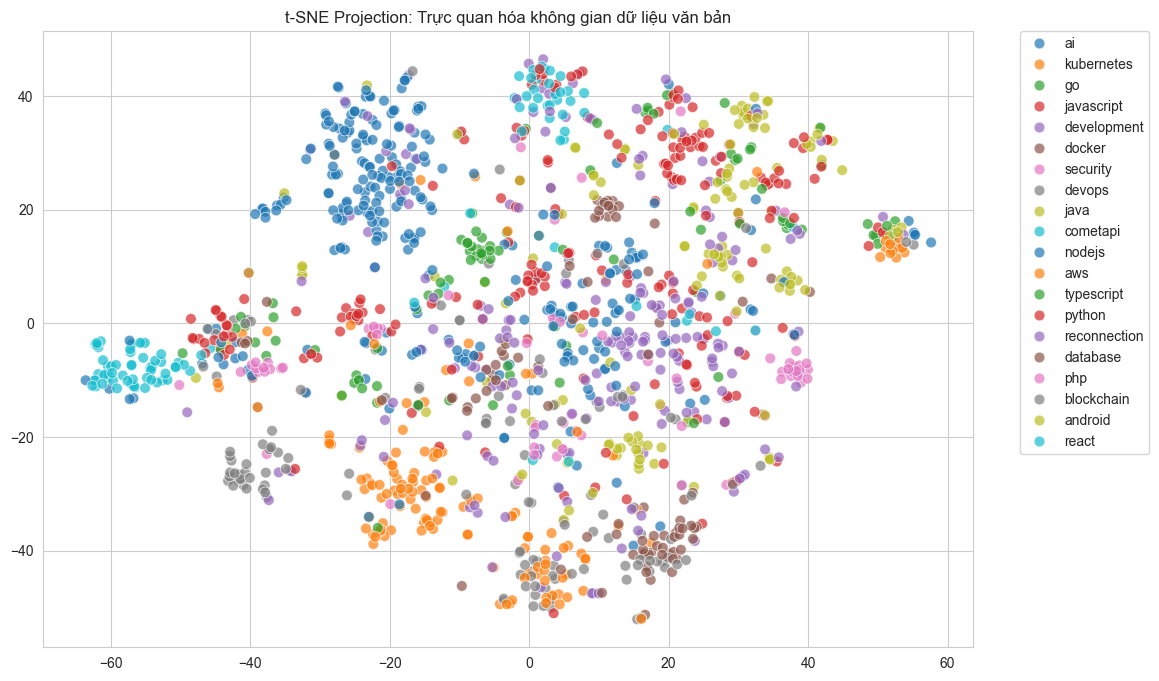

In [16]:
print("⏳ Đang chạy t-SNE (có thể mất 1-2 phút)...")

# 1. Vector hóa dữ liệu (Lấy 1000 features quan trọng nhất)
# Nối tokens thành chuỗi để vector hóa
df['text_clean'] = df['tokens'].apply(lambda x: ' '.join(x))
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['text_clean'])

# 2. Lấy mẫu (Sampling) nếu dữ liệu quá lớn (t-SNE chạy lâu)
SAMPLE_SIZE = 1500
if X_tfidf.shape[0] > SAMPLE_SIZE:
    # Lấy ngẫu nhiên
    indices = np.random.choice(X_tfidf.shape[0], SAMPLE_SIZE, replace=False)
    X_sample = X_tfidf[indices].toarray()
    # Lấy tag chính (tag đầu tiên) để tô màu
    y_sample = [df.iloc[i]['tags_final'][0] for i in indices]
else:
    X_sample = X_tfidf.toarray()
    y_sample = [tags[0] for tags in df['tags_final']]

# 3. Giảm chiều bằng t-SNE
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=200)
X_embedded = tsne.fit_transform(X_sample)

# 4. Chỉ tô màu cho 10 Tag phổ biến nhất (còn lại gộp là 'Other' cho đỡ rối màu)
top_20_set = set(top_20_list)
y_plot = [tag if tag in top_20_set else 'Other' for tag in y_sample]

# 5. Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_embedded[:,0], y=X_embedded[:,1],
    hue=y_plot,
    palette='tab10',
    alpha=0.7,
    s=60
)
plt.title('t-SNE Projection: Trực quan hóa không gian dữ liệu văn bản')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import ast  # <--- Cần thêm thư viện này

# 1. Đọc dữ liệu
df_ngram = pd.read_csv("clean_data_no_stopwords.csv")

# 2. Chuyển đổi chuỗi string "['a', 'b']" thành list thực tế ['a', 'b']
# Bước này cực kỳ quan trọng khi đọc từ CSV
df_ngram['tokens'] = df_ngram['tokens'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# 3. Nối các từ lại thành câu (clean_text)
df_ngram['clean_text'] = df_ngram['tokens'].apply(
    lambda x: " ".join(x) if isinstance(x, list) else ""
)

# Hàm lấy n-gram (Giữ nguyên như của bạn)
def get_top_n_ngram(corpus, ngram=(2, 2), top_k=20, min_df=2):
    vec = CountVectorizer(
        ngram_range=ngram,
        lowercase=False,
        min_df=min_df,
        token_pattern=r"(?u)\b\w+\b"
    )
    # Kiểm tra xem corpus có dữ liệu không
    if corpus.empty or corpus.str.strip().eq("").all():
        print("Cảnh báo: Dữ liệu đầu vào rỗng!")
        return pd.DataFrame()

    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    freqs = [
        (word, int(sum_words[0, idx]))
        for word, idx in vec.vocabulary_.items()
    ]
    return (
        pd.DataFrame(freqs, columns=['ngram', 'count'])
        .sort_values('count', ascending=False)
        .head(top_k)
    )

# 4. Chạy Bigram
df_bigram = get_top_n_ngram(
    df_ngram['clean_text'],
    ngram=(2, 2),
    top_k=20,
    min_df=2
)
print("TOP 20 BIGRAM")
print(df_bigram) # Dùng print thay vì display nếu không chạy trong Jupyter Notebook

# 5. Chạy Trigram
df_trigram = get_top_n_ngram(
    df_ngram['clean_text'],
    ngram=(3, 3),
    top_k=20,
    min_df=2
)
print("\nTOP 20 TRIGRAM")
print(df_trigram)

TOP 20 BIGRAM
                    ngram  count
2336        cơ_sở dữ_liệu   1845
1625               tác vụ   1577
6084             truy vấn   1490
402               node js   1375
1441          trải nghiệm   1115
5433         kiểu dữ_liệu   1003
1623          tự_động hóa    884
1466          câu trả_lời    800
4540   ngôn_ngữ lập_trình    684
29533         tập dữ_liệu    672
34                such as    665
13135        align center    645
9858            div align    637
18479        ứng_dụng web    591
16203             đám mây    591
4144                ci cd    590
4909         độ chính_xác    578
516                can be    563
5262    xây_dựng ứng_dụng    556
2294     mô_hình ngôn_ngữ    534

TOP 20 TRIGRAM
                               ngram  count
4376                div align center    621
49591                  câu đừng ngại    272
49590                bất_kỳ câu đừng    272
7521               đừng ngại comment    225
58078  động_lực chất_lượng tương_lai    218
49388        

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import math
import os

# --- Thư mục lưu ảnh ---
output_dir = "photo/exported"
os.makedirs(output_dir, exist_ok=True)

# --- Hàm vẽ top words cho mỗi tag ---
def plot_top_words(tag, save_path=None):
    subset = df[df['tags_final'].apply(lambda x: tag in x)]
    text = " ".join([" ".join(tokens) for tokens in subset['tokens']])
    
    if not text.strip():
        print(f"{tag} has no data, skipping.")
        return

    try:
        vec = CountVectorizer(max_features=10).fit([text])
        bag_of_words = vec.transform([text])
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        words_df = pd.DataFrame(words_freq, columns=['Word', 'Freq'])
        
        # --- Vẽ figure lớn, dễ nhìn ---
        fig, ax = plt.subplots(figsize=(12, 8))  # chiều ngang 12, cao 8
        sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')
        ax.set_title(f"Tag: {tag.upper()}", fontsize=18, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='y', labelsize=14)
        ax.tick_params(axis='x', labelsize=12)
        
        plt.tight_layout(pad=3.0)
        
        # --- Lưu ảnh nếu có đường dẫn ---
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved figure: {save_path}")
        
        plt.close(fig)  # đóng figure để không hiển thị hoặc chiếm bộ nhớ
        
    except ValueError:
        print(f"{tag} has too little data, skipping.")
        return

# --- Xuất từng tag ra file riêng ---
for tag_name in top_20_tag_names:
    filename = f"{tag_name.replace(' ', '_')}.png"  # đổi khoảng trắng thành _
    save_path = os.path.join(output_dir, filename)
    plot_top_words(tag_name, save_path=save_path)


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\ai.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\javascript.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\development.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\aws.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\devops.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\reconnection.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\react.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\java.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\go.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\kubernetes.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\nodejs.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\cometapi.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\android.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\docker.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\python.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\security.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\blockchain.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\database.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\typescript.png


C:\Users\thaip\AppData\Local\Temp\ipykernel_26440\2208045852.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Freq', y='Word', ax=ax, palette='Blues_r')


Saved figure: photo/exported\php.png
